In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
# Model Parameters
# 3 layer neural network
input_size = 2
layers = [4,3] # no. of neurons in the first and the second layer
output_size = 2


In [152]:

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [153]:

class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [154]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

# Creating a hot vector using numpy 
# y = labels
# depth = No. of classes 

    
def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [155]:
# Generate Dataset
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt


In [156]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

In [157]:

print(X.shape)
print(Y.shape)

(500, 2)
(500,)


In [158]:
depth = 2 #We have two classes
y_hot = one_hot(Y,depth)
print(y_hot.shape)
print(y_hot)

(500, 2)
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

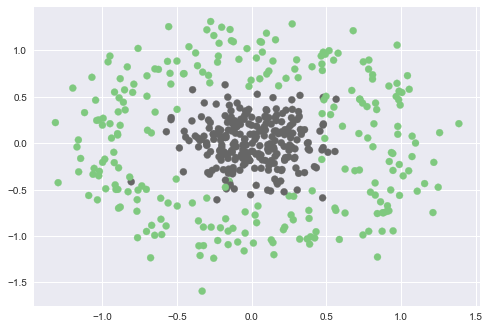

In [159]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

## Training Our Model

In [160]:
model  = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [161]:
model.forward(X)
model.summary()

W1  (2, 10)
A1  (500, 10)
W2  (10, 5)
A2  (500, 5)
W3  (5, 2)
Y_  (500, 2)


In [162]:

def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [163]:
loss_list = train(X,Y,model,1000,0.001)

Epoch 0 Loss 0.3571
Epoch 1 Loss 0.3554
Epoch 2 Loss 0.2593
Epoch 3 Loss 0.2407
Epoch 4 Loss 0.2258
Epoch 5 Loss 0.2132
Epoch 6 Loss 0.2020
Epoch 7 Loss 0.1919
Epoch 8 Loss 0.1827
Epoch 9 Loss 0.1742
Epoch 10 Loss 0.1664
Epoch 11 Loss 0.1593
Epoch 12 Loss 0.1527
Epoch 13 Loss 0.1467
Epoch 14 Loss 0.1411
Epoch 15 Loss 0.1360
Epoch 16 Loss 0.1313
Epoch 17 Loss 0.1270
Epoch 18 Loss 0.1230
Epoch 19 Loss 0.1193
Epoch 20 Loss 0.1159
Epoch 21 Loss 0.1127
Epoch 22 Loss 0.1098
Epoch 23 Loss 0.1070
Epoch 24 Loss 0.1045
Epoch 25 Loss 0.1021
Epoch 26 Loss 0.0999
Epoch 27 Loss 0.0978
Epoch 28 Loss 0.0958
Epoch 29 Loss 0.0940
Epoch 30 Loss 0.0922
Epoch 31 Loss 0.0906
Epoch 32 Loss 0.0891
Epoch 33 Loss 0.0876
Epoch 34 Loss 0.0862
Epoch 35 Loss 0.0849
Epoch 36 Loss 0.0837
Epoch 37 Loss 0.0825
Epoch 38 Loss 0.0814
Epoch 39 Loss 0.0803
Epoch 40 Loss 0.0793
Epoch 41 Loss 0.0783
Epoch 42 Loss 0.0774
Epoch 43 Loss 0.0765
Epoch 44 Loss 0.0756
Epoch 45 Loss 0.0748
Epoch 46 Loss 0.0740
Epoch 47 Loss 0.0732
Ep

Epoch 380 Loss 0.0409
Epoch 381 Loss 0.0408
Epoch 382 Loss 0.0408
Epoch 383 Loss 0.0408
Epoch 384 Loss 0.0408
Epoch 385 Loss 0.0408
Epoch 386 Loss 0.0408
Epoch 387 Loss 0.0408
Epoch 388 Loss 0.0407
Epoch 389 Loss 0.0407
Epoch 390 Loss 0.0407
Epoch 391 Loss 0.0407
Epoch 392 Loss 0.0407
Epoch 393 Loss 0.0407
Epoch 394 Loss 0.0407
Epoch 395 Loss 0.0406
Epoch 396 Loss 0.0406
Epoch 397 Loss 0.0406
Epoch 398 Loss 0.0406
Epoch 399 Loss 0.0406
Epoch 400 Loss 0.0406
Epoch 401 Loss 0.0406
Epoch 402 Loss 0.0405
Epoch 403 Loss 0.0405
Epoch 404 Loss 0.0405
Epoch 405 Loss 0.0405
Epoch 406 Loss 0.0405
Epoch 407 Loss 0.0405
Epoch 408 Loss 0.0405
Epoch 409 Loss 0.0404
Epoch 410 Loss 0.0404
Epoch 411 Loss 0.0404
Epoch 412 Loss 0.0404
Epoch 413 Loss 0.0404
Epoch 414 Loss 0.0404
Epoch 415 Loss 0.0404
Epoch 416 Loss 0.0403
Epoch 417 Loss 0.0403
Epoch 418 Loss 0.0403
Epoch 419 Loss 0.0403
Epoch 420 Loss 0.0403
Epoch 421 Loss 0.0403
Epoch 422 Loss 0.0403
Epoch 423 Loss 0.0403
Epoch 424 Loss 0.0402
Epoch 425 

Epoch 761 Loss 0.0374
Epoch 762 Loss 0.0374
Epoch 763 Loss 0.0373
Epoch 764 Loss 0.0373
Epoch 765 Loss 0.0373
Epoch 766 Loss 0.0373
Epoch 767 Loss 0.0373
Epoch 768 Loss 0.0373
Epoch 769 Loss 0.0373
Epoch 770 Loss 0.0373
Epoch 771 Loss 0.0373
Epoch 772 Loss 0.0373
Epoch 773 Loss 0.0373
Epoch 774 Loss 0.0373
Epoch 775 Loss 0.0373
Epoch 776 Loss 0.0373
Epoch 777 Loss 0.0373
Epoch 778 Loss 0.0373
Epoch 779 Loss 0.0373
Epoch 780 Loss 0.0373
Epoch 781 Loss 0.0372
Epoch 782 Loss 0.0372
Epoch 783 Loss 0.0372
Epoch 784 Loss 0.0372
Epoch 785 Loss 0.0372
Epoch 786 Loss 0.0372
Epoch 787 Loss 0.0372
Epoch 788 Loss 0.0372
Epoch 789 Loss 0.0372
Epoch 790 Loss 0.0372
Epoch 791 Loss 0.0372
Epoch 792 Loss 0.0372
Epoch 793 Loss 0.0372
Epoch 794 Loss 0.0372
Epoch 795 Loss 0.0372
Epoch 796 Loss 0.0372
Epoch 797 Loss 0.0372
Epoch 798 Loss 0.0371
Epoch 799 Loss 0.0371
Epoch 800 Loss 0.0371
Epoch 801 Loss 0.0371
Epoch 802 Loss 0.0371
Epoch 803 Loss 0.0371
Epoch 804 Loss 0.0371
Epoch 805 Loss 0.0371
Epoch 806 

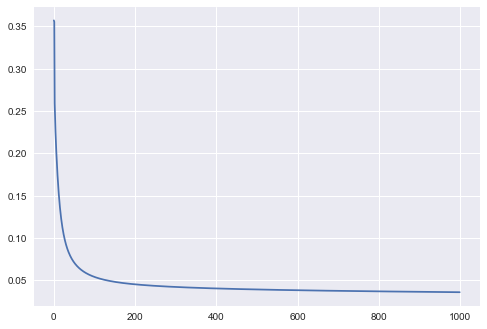

In [164]:
plt.plot(loss_list)

In [165]:
outputs = model.predict(X)
print(outputs)
print(outputs.shape)


[1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1
 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1
 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 0 0 1 1 0 

In [166]:
total = 0
for i in range(X.shape[0]):
    if outputs[i] == Y[i]:
        total+=1
acc = total/X.shape[0]
print(acc)

0.97


In [167]:
acc = np.sum(outputs==Y)/Y.shape[0]
print(acc)

0.97


## Plotting the Decision Boundary

In [168]:
from visualize import plot_decision_boundary

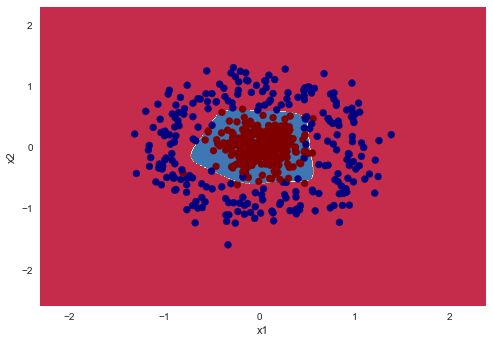

In [169]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)